# 1. Install Dependencies and Setup

In [1]:
!pip install tensorflow==2.10 opencv-python matplotlib

You should consider upgrading via the 'C:\Users\Asus\Documents\GitHub\Deep CNN Image Classifier\imgclassifier\Scripts\python.exe -m pip install --upgrade pip' command.


In [2]:
!pip list

Package                      Version
---------------------------- -----------
absl-py                      2.1.0
asttokens                    2.4.1
astunparse                   1.6.3
cachetools                   5.3.3
certifi                      2024.2.2
charset-normalizer           3.3.2
colorama                     0.4.6
comm                         0.2.2
contourpy                    1.2.0
cycler                       0.12.1
debugpy                      1.8.1
decorator                    5.1.1
exceptiongroup               1.2.0
executing                    2.0.1
flatbuffers                  24.3.7
fonttools                    4.49.0
gast                         0.4.0
google-auth                  2.28.2
google-auth-oauthlib         0.4.6
google-pasta                 0.2.0
grpcio                       1.62.1
h5py                         3.10.0
idna                         3.6
ipykernel                    6.29.3
ipython                      8.22.2
jedi                         0.19.1
ju

You should consider upgrading via the 'C:\Users\Asus\Documents\GitHub\Deep CNN Image Classifier\imgclassifier\Scripts\python.exe -m pip install --upgrade pip' command.


In [3]:
import tensorflow as tf
import os

## GPU Acceleration

In [ ]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
tf.config.list_physical_devices('GPU')

# 2. Remove dodgy images

In [4]:
import cv2
import imghdr

In [5]:
data_dir = 'data' 

In [6]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [7]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 3. Load Data

In [8]:
import numpy as np
from matplotlib import pyplot as plt

In [9]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 305 files belonging to 2 classes.


In [10]:
data_iterator = data.as_numpy_iterator()

In [11]:
batch = data_iterator.next()

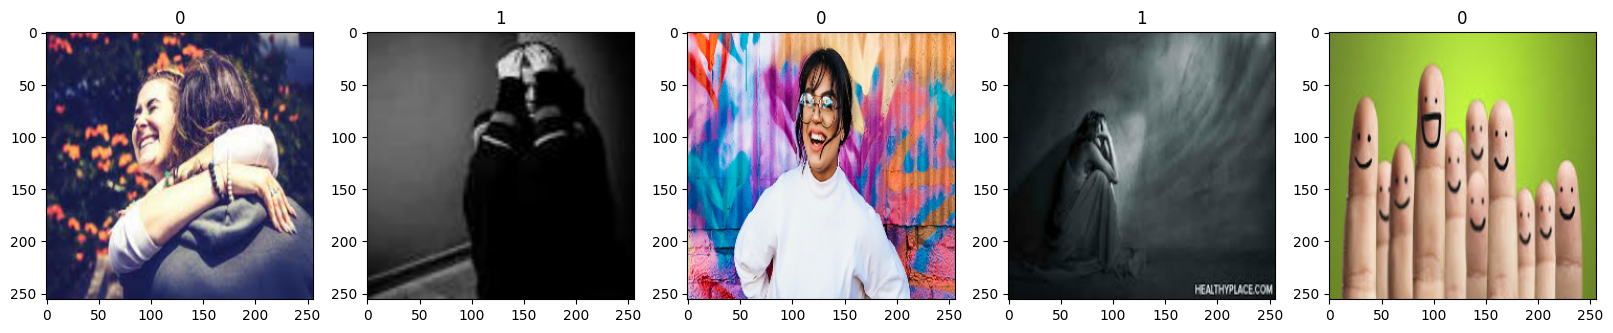

In [18]:
fig, ax = plt.subplots(ncols=5, figsize=(20,20))
for idx, img in enumerate(batch[0][:5]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [19]:
data = data.map(lambda x,y: (x/255, y))

In [20]:
data.as_numpy_iterator().next()

(array([[[[0.66007334, 0.6639949 , 0.6404655 ],
          [0.6712278 , 0.6751494 , 0.65162   ],
          [0.66738015, 0.6713017 , 0.6477723 ],
          ...,
          [0.6603784 , 0.67998624, 0.6564568 ],
          [0.65345055, 0.6730584 , 0.649529  ],
          [0.654902  , 0.6745098 , 0.6509804 ]],
 
         [[0.6694355 , 0.67335707, 0.64982766],
          [0.6761719 , 0.68009347, 0.65656406],
          [0.6745098 , 0.6784314 , 0.654902  ],
          ...,
          [0.6627451 , 0.68235296, 0.65882355],
          [0.6553576 , 0.67496544, 0.65143603],
          [0.654902  , 0.6745098 , 0.6509804 ]],
 
         [[0.662814  , 0.6667356 , 0.6432062 ],
          [0.665288  , 0.66920954, 0.6456801 ],
          [0.67065716, 0.6745787 , 0.6510493 ],
          ...,
          [0.6665977 , 0.68620557, 0.66267616],
          [0.65730697, 0.6769148 , 0.6533854 ],
          [0.651546  , 0.67115384, 0.64762443]],
 
         ...,
 
         [[0.5172016 , 0.53680944, 0.5524957 ],
          [0.53576

# 5. Split Data

In [21]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [22]:
train_size

7

In [23]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [24]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [27]:
model = Sequential()

In [28]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [29]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

# 7. Train

In [31]:
logdir='logs'

In [32]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [33]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 6s 661ms/step - loss: 1.3035 - accuracy: 0.4777 - val_loss: 0.6941 - val_accuracy: 0.4219
Epoch 2/20
7/7 [==============================] - 6s 651ms/step - loss: 0.6789 - accuracy: 0.5491 - val_loss: 0.6410 - val_accuracy: 0.5469
Epoch 3/20
7/7 [==============================] - 5s 633ms/step - loss: 0.6337 - accuracy: 0.6652 - val_loss: 0.5836 - val_accuracy: 0.6406
Epoch 4/20
7/7 [==============================] - 5s 655ms/step - loss: 0.5745 - accuracy: 0.7277 - val_loss: 0.4683 - val_accuracy: 0.8594
Epoch 5/20
7/7 [==============================] - 5s 638ms/step - loss: 0.4679 - accuracy: 0.8259 - val_loss: 0.5282 - val_accuracy: 0.7812
Epoch 6/20
7/7 [==============================] - 6s 723ms/step - loss: 0.4218 - accuracy: 0.8080 - val_loss: 0.3047 - val_accuracy: 0.9531
Epoch 7/20
7/7 [==============================] - 5s 655ms/step - loss: 0.3384 - accuracy: 0.8795 - val_loss: 0.3021 - val_accuracy: 0.9219
Epoch 8/20
7/7 [====

# 8. Plot Performance

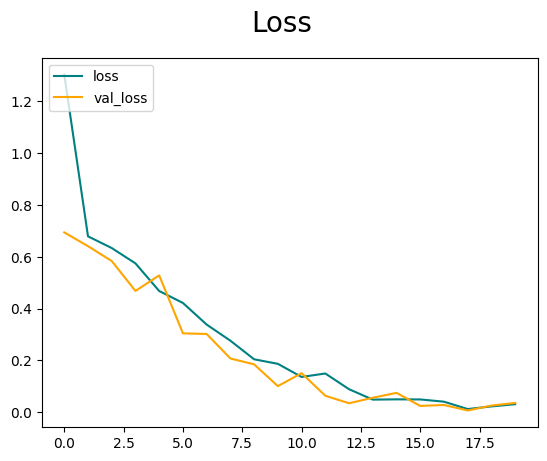

In [34]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

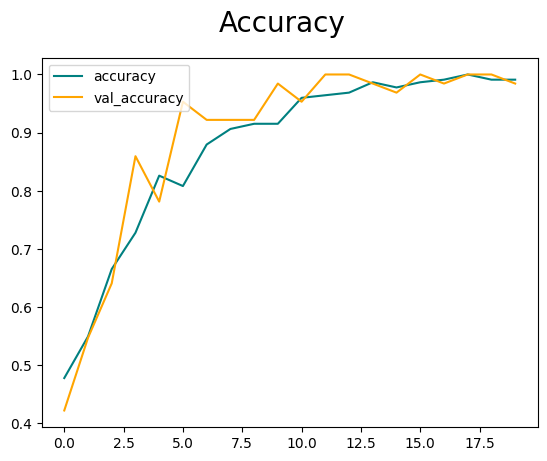

In [35]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [36]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [37]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [38]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 139ms/step


In [39]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


# 10. Test

In [40]:
import cv2

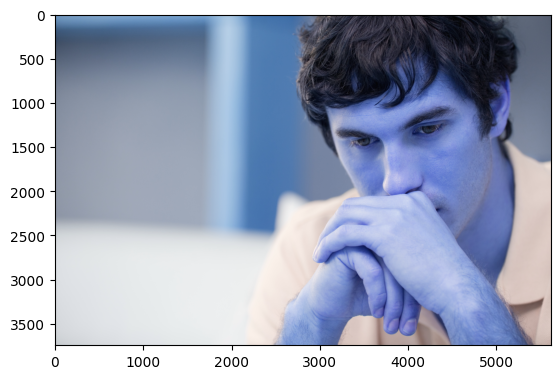

In [48]:
img = cv2.imread('testOne.jpg')
plt.imshow(img)
plt.show()

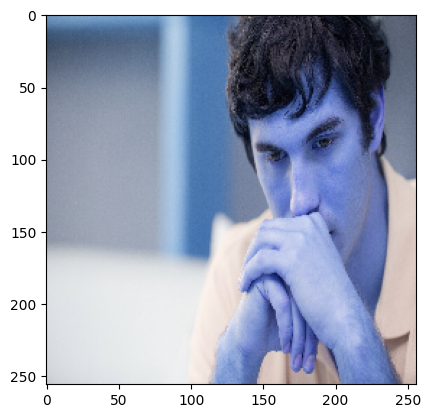

In [49]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [50]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 22ms/step


In [51]:
yhat

array([[0.9488911]], dtype=float32)

In [52]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


# 11. Save the Model

In [46]:
from tensorflow.keras.models import load_model

In [47]:
model.save(os.path.join('models','imageclassifier.h5'))

In [ ]:
new_model = load_model('imageclassifier.h5')

In [ ]:
new_model.predict(np.expand_dims(resize/255, 0))